# Flight Fare Prediction ( Regression Problem )

## Steps :

<ol>
    <li>Importing the Libraries
    <li>Importing Dataset
    <li>Training Data Preprocessing
    <li>Exploratory Data Analysis (EDA)
    <li>Handling Categorical Data
    <li>Testing Data Preprocessing
    <li>Feature Selection
    <li>Model Creation and Evalution
    <li>Front-End Creation
    <li>Deployment
</ol>

<br>

## Importing Required Libraries

<ol>
    <li>Numpy : For calculations and numerical process
    <li>Pandas : Data Analysis and Manipulation
    <li>Matplotlib : Data Visualisation
    <li>Seaborn : Data Visualisation
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

<br>

## Importing Dataset

<ol>
    <li>Here, the Data is stored in the file with .xlsx extension, So we have to use read_excel() function to import data.
    <li>Now, we explore the Dataset and then hunt for missing values and handle them.
    <li>If null values are present, then we impute the missing values with either mean, median or mode.
    <li>For Statistical analysis, we use the describe() method.
       

In [2]:
#importing Dataset
training_data = pd.read_excel(r"Data_set/Data_Train.xlsx")

In [3]:
#Printing First five rows of the Training Data
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<br>

## Training Data Preprocessing

In [4]:
#Number of rows and columns in the Dataset
training_data.shape

(10683, 11)

In [5]:
#Information of Data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#Checking for the missing values
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Handling the missing values
training_data.dropna(inplace = True)
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Statistical Analysis
training_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
#Checking Distribution of the Categorical data
print(training_data["Airline"].value_counts(),"\n")
print(training_data["Source"].value_counts(),"\n")
print(training_data["Destination"].value_counts(),"\n")
print(training_data["Total_Stops"].value_counts(),"\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64 



<br>

## Exploratory Data Analysis

<ol>
    <li>From above description, we get to know that "Date_of_Journey", "Dep_time" and "Arrival_time" are of "object" type. So, we have to convert them into datetime object for using them for prediction of the fare price.
    <li>For converting, we use pd.to_datetime() function of the pandas.
</ol>    

#### Converting Date_of_Journey

In [10]:
training_data["Date_of_Journey"] = pd.to_datetime(training_data.Date_of_Journey, format = "%d/%m/%Y")
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<br>

In [11]:
#Adding new columns( Journey_day, Journey_month, Journey_year)

#extracting day from date
training_data["Journey_day"] = training_data["Date_of_Journey"].dt.day

#extracting month from date
training_data["Journey_month"] = training_data["Date_of_Journey"].dt.month

# #extracting year from date
# training_data["Journey_year"] = training_data["Date_of_Journey"].dt.year

training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
#Droping the 'Date_of_Journey' column because now it is of no use
training_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


<br>

#### Converting Arrival_time and Dep_time

In [13]:
#Converting Arrival_Time into datetime
training_data["Arrival_Time"] = pd.to_datetime(training_data.Arrival_Time)

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2023-06-23 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2023-06-23 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2023-06-23 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [14]:
#adding new columns (Arrival_hour, Arrival_min)

#extracting Arrival hour
training_data["Arrival_hour"] = training_data["Arrival_Time"].dt.hour

#extracting Arrival hour
training_data["Arrival_min"] = training_data["Arrival_Time"].dt.minute

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2023-06-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2023-06-23 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2023-06-23 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [15]:
#Droping Arrival_Time Column because it is of no use
training_data.drop(['Arrival_Time'], axis = 1, inplace = True)

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


<br>

In [16]:
#Converting Dep_time into datetime 
training_data["Dep_Time"] = pd.to_datetime(training_data.Dep_Time)
training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-23 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-23 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-23 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-23 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-23 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


<br>

In [17]:
#adding new columns (Dep_hour, Dep_min)
training_data["Dep_hour"] = training_data["Dep_Time"].dt.hour

training_data["Dep_min"] = training_data["Dep_Time"].dt.minute
training_data.head()


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-23 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-23 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-23 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-23 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-23 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [18]:
#Droping Dep_Time Column because it is of no use
training_data.drop(["Dep_Time"], axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


<br>

In [19]:
#Converting Duration into Duration in minutes
duration =  list(training_data['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))
        
training_data["Duration_min"] =  minutes
training_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,285


In [20]:
#Droping Duration Column because it is of no use
training_data.drop("Duration", axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,285


<br>

## Handling Categorical Variables

<ul>
    <li>Label Encoder -> We use these when we have Ordinal Data in our Dataset.
    <li>OneHot Encoder -> We use these when we have Nominal Data in our Dataset.
</ul>    

In [21]:
#Checking Distribution of Source column
training_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

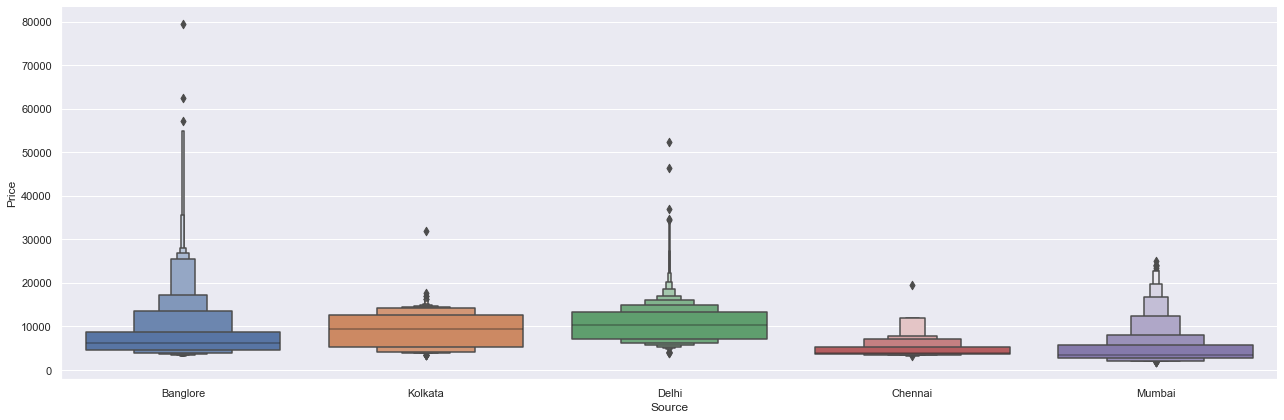

In [22]:
#Visualizing the Source vs Price
sns.catplot(x = "Source", y = "Price", data = training_data, kind = 'boxen', aspect = 3, height = 6)

In [23]:
#Extracting Source column from Dataframe and encode it into OneHot Encoding
source = training_data['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
#Checking Distribution of Destination column
training_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

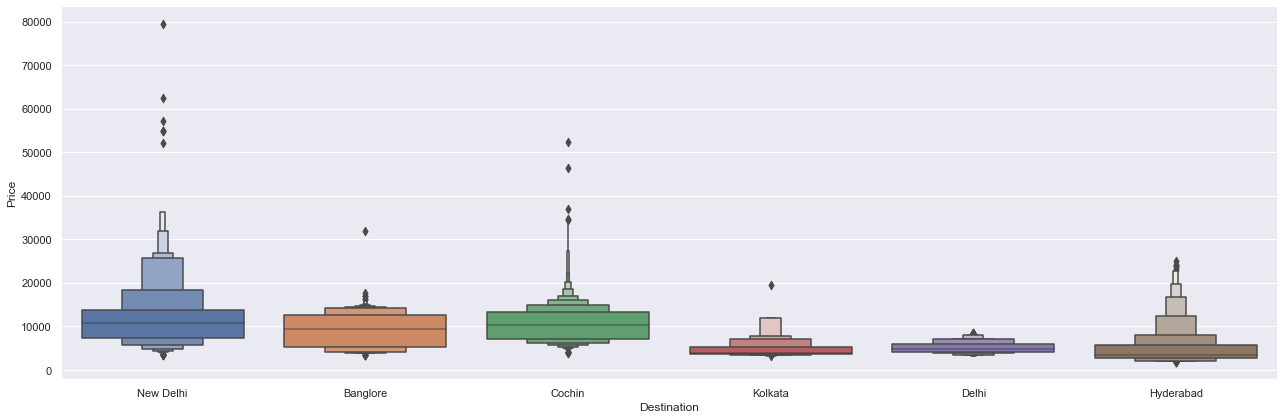

In [25]:
#Visualizing the Destination vs Price
sns.catplot(x = "Destination", y = "Price", data = training_data, kind = 'boxen', aspect = 3, height = 6)

In [26]:
#Extracting Destination column from Dataframe and encode it into OneHot Encoding
destination = training_data['Destination']
destination = pd.get_dummies(destination , drop_first = True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
#Checking Distribution of Airline column
training_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

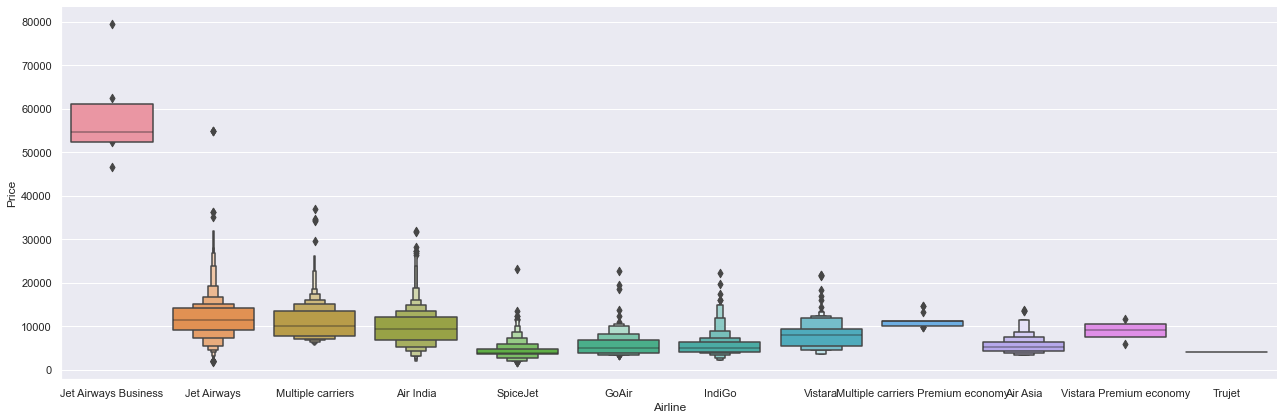

In [28]:
#Visualizing the Airline vs Price
sns.catplot(x = "Airline", y = "Price", data = training_data.sort_values("Price", ascending = False), kind = 'boxen', aspect = 3, height = 6)

In [29]:
#Extracting Airline column from Dataframe and encode it into OneHot Encoding
airlines = training_data['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<br>

<b>Here, The "Route" and "Total_Stops" columns are correlated with each other. It means the "Route" shows us the Source, Intermediate stops and Destination and "Total_Stops" is number of Intermediate Stops. So, in regression we have to remove these correlated columns.</b>

In [30]:
#Droping Route Column to remove Correlation
training_data.drop('Route', axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,285


In [31]:
#Checking Distribution of Total_Stops column
training_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
#Replacing String values with the integer for calculations
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
training_data.replace(stops, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,285


In [33]:
#Checking Distribution of Additional_Info column
training_data['Additional_Info'].value_counts(normalize = True)

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

<br>

<b>Here, we can see that approximately 80% of the rows in the "Additional_Info" column is filled with "no_info" which is dominating and can leads to bad predictions. So, we have to drop this column.</b>

In [34]:
#Droping Additional_Info Column
training_data.drop('Additional_Info', axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285


In [35]:
#Merging all the dataframe 
processed_data = pd.concat([training_data, source, destination, airlines], axis = 1)
processed_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0,1,0,0,0,0,0,0,0,0


In [36]:
processed_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)
processed_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Chennai,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,1,10,22,20,170,0,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,13,15,5,50,445,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,1140,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,23,30,18,5,325,0,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,285,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
processed_data.shape

(10682, 29)

Now our processed data contains 10682 rows and 29 columns.

## Preprocessing Test Data

In [38]:
test_data = pd.read_excel(r"Data_set/Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
test_data.shape

(2671, 10)

In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [41]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [42]:
print(test_data["Airline"].value_counts(),"\n")
print(test_data["Source"].value_counts(),"\n")
print(test_data["Destination"].value_counts(),"\n")
print(test_data["Total_Stops"].value_counts(),"\n")
print(test_data["Date_of_Journey"].value_counts(),"\n")


Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64 

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64 

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64 

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64 

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105


In [43]:
test_data["Date_of_Journey"] = pd.to_datetime(test_data.Date_of_Journey, format = "%d/%m/%Y")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
#Adding new columns( Journey_day, Journey_month, Journey_year)

#extracting day from date
test_data["Journey_day"] = test_data["Date_of_Journey"].dt.day

#extracting month from date
test_data["Journey_month"] = test_data["Date_of_Journey"].dt.month
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285


In [45]:
#Droping the 'Date_of_Journey' column because noe it is of no use
test_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [46]:
#Converting Arrival_Time into datetime
test_data["Arrival_Time"] = pd.to_datetime(test_data.Arrival_Time)

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,2023-06-23 10:20:00,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,2023-06-23 21:00:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6


In [47]:
#adding new columns (Arrival_hour, Arrival_min)

#extracting Arrival hour
test_data["Arrival_hour"] = test_data["Arrival_Time"].dt.hour

#extracting Arrival hour
test_data["Arrival_min"] = test_data["Arrival_Time"].dt.minute

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,2023-06-23 10:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,2023-06-23 21:00:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6,2,45


In [48]:
#Droping Arrival_Time Column because it is of no use
test_data.drop(['Arrival_Time'], axis = 1, inplace = True)

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,24,6,2,45


In [49]:
#Converting Dep_time to datetime 
test_data["Dep_Time"] = pd.to_datetime(test_data.Dep_Time)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-06-23 17:30:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2023-06-23 06:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-06-23 19:15:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-06-23 08:00:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2023-06-23 23:55:00,2h 50m,non-stop,No info,24,6,2,45


In [50]:
#Adding new columns (Dep_hour, Dep_min)

#extracting Arrival hour
test_data["Dep_hour"] = test_data["Dep_Time"].dt.hour

#extracting Arrival minute
test_data["Dep_min"] = test_data["Dep_Time"].dt.minute
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-06-23 17:30:00,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2023-06-23 06:20:00,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2023-06-23 19:15:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2023-06-23 08:00:00,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2023-06-23 23:55:00,2h 50m,non-stop,No info,24,6,2,45,23,55


In [51]:
#Droping Dep_Time Column because it is of no use
test_data.drop(["Dep_Time"], axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


In [52]:
duration =  list(test_data['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))
        

In [53]:
test_data["Duration_min"] =  minutes
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55,170


In [54]:
test_data.drop("Duration", axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,45,23,55,170


In [55]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

## Handling Categorical Variables
We use Label Encoder when we have Ordinal Data. Since, we have only nominal data in our dataset, we will use one hot encoder to handle the categorical columns.

In [56]:
#Converting Source 
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [57]:
source = test_data['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [58]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [59]:
destination = test_data['Destination']
destination = pd.get_dummies(destination , drop_first = True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [60]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [61]:
airlines = test_data['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


The columns, 'Route' and 'Total_Stops' are correlated. In regression problem, we have to remove the correlated features. Thus we drop route coulumn.   

In [62]:
test_data.drop('Route', axis = 1, inplace = True)
test_data.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,2,45,23,55,170


In [63]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [64]:
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
test_data.replace(stops, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,No info,24,6,2,45,23,55,170


In [65]:
test_data['Additional_Info'].value_counts(normalize = True)

No info                         0.804193
In-flight meal not included     0.166230
No check-in baggage included    0.028454
1 Long layover                  0.000374
Business class                  0.000374
Change airports                 0.000374
Name: Additional_Info, dtype: float64

We can se that approx. 80% of the data in the column Additional_Info has the value 'no info'. The data in this column is not randomized and causes a problem in our prediction. Thus, we drop this column.

In [66]:
test_data.drop('Additional_Info', axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,170


In [67]:
processed_test = pd.concat([test_data, source, destination, airlines], axis = 1)
processed_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,...,0,0,0,1,0,0,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,...,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,...,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,...,0,0,0,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,...,0,0,0,0,0,0,0,0,0,0


In [68]:
processed_test.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)
processed_test.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Chennai,Delhi,...,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,1,6,6,4,25,17,30,655,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,12,5,10,20,6,20,240,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,0,19,15,1425,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,21,5,21,0,8,0,780,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,170,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
processed_test.shape
processed_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

<br>

## Feature Selection

Here, we find out the best features for training the model and also see at what extent they contribute to our fare prediction. We do these by
<ol>
    <li>Heatmap
    <li>feature_importances_
</ol>

In [70]:
#Checking for number of rows and columns
processed_data.shape

(10682, 29)

In [71]:
#Checking for Column names
processed_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [72]:
#Extracting X = Independent/Predictor Variable and Y = Dependent/Target Variable
X = processed_data.drop("Price", axis = 1).values
Y = processed_data["Price"].values

print("X =", X)
print()
print("Y =", Y)

X = [[ 0 24  3 ...  0  0  0]
 [ 2  1  5 ...  0  0  0]
 [ 2  9  6 ...  0  0  0]
 ...
 [ 0 27  4 ...  0  0  0]
 [ 0  1  3 ...  0  1  0]
 [ 2  9  5 ...  0  0  0]]

Y = [ 3897  7662 13882 ...  7229 12648 11753]


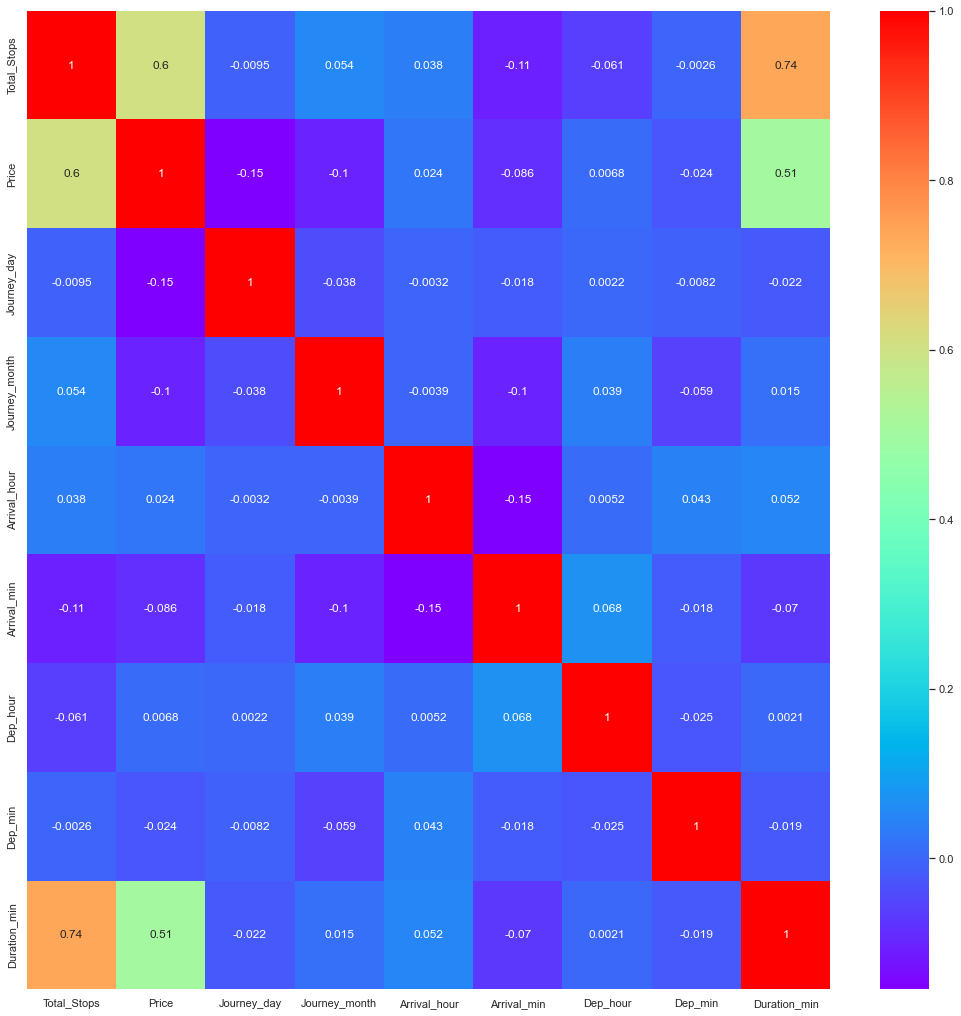

In [73]:
#Creating Heatmap to analyze relation between features
plt.figure(figsize = (18,18))
sns.heatmap(training_data.corr(), annot = True, cmap = "rainbow")
plt.show()

<br>

In [74]:
#Extracting important features using ExtraTreesRegresser
from sklearn.ensemble import ExtraTreesRegressor

imp_features = ExtraTreesRegressor()
imp_features.fit(X, Y)

ExtraTreesRegressor()

In [75]:
#Displaying importance features proportions
print(imp_features.feature_importances_)

[2.35429731e-01 1.45091035e-01 5.29150957e-02 2.95756322e-02
 2.20097949e-02 2.66221173e-02 2.56079268e-02 1.20773481e-01
 4.65559331e-04 1.33158750e-02 3.51276230e-03 8.04627347e-03
 1.03888419e-02 1.45067831e-02 6.30265706e-03 5.23460097e-04
 2.45768292e-02 1.11091481e-02 2.03149532e-03 1.77672832e-02
 1.34437060e-01 6.72753796e-02 1.87937299e-02 8.62489113e-04
 2.79054991e-03 9.19975209e-05 5.10486521e-03 7.21465013e-05]


<AxesSubplot:>

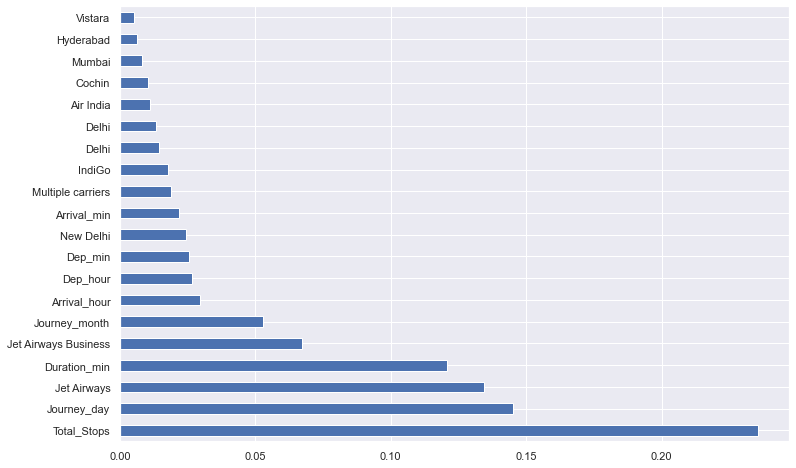

In [76]:
#Visualizing the feature_importances_
plt.figure(figsize = (12, 8))
columns = processed_data.drop("Price", axis = 1).columns
fseries = pd.Series(imp_features.feature_importances_, index = columns)
fseries.nlargest(20).plot(kind = "barh")

<br>

## Fitting the Model using Different Models

1. Split data into train and test so as to predict w.r.t. 'X_test'.
2. Import the model(which suits the data most or gives better results)
3. Fit training data into it
4. Predict w.r.t. 'X_test' (compare with 'Y_test')
5. In regression models check **RMSE** score
6. Plot final graphs

In [77]:
#Splitting the processed_data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print("Training Set \nX =", X_train.shape, "\nY =", Y_train.shape)
print()
print("Test Set \nX =", X_test.shape, "\nY =", Y_test.shape)

Training Set 
X = (8545, 28) 
Y = (8545,)

Test Set 
X = (2137, 28) 
Y = (2137,)


In [78]:
#Importing the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

<br>

#### Creating Model using Multiple Linear Regression

In [79]:
#Creating and Fitting the Model
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)
# Finding the coefficient and intercept for plotting the regression line
coefficients = pd.Series(reg_model.coef_, index = columns)
intercept = reg_model.intercept_

print("Intercept -->", intercept)
print("\nCoefficients -->\n\n", coefficients)

Intercept --> 7265.635876236743

Coefficients -->

 Total_Stops                           2758.791835
Journey_day                            -72.485351
Journey_month                         -425.509040
Arrival_hour                           -11.238578
Arrival_min                              2.022347
Dep_hour                                20.521709
Dep_min                                 -2.317950
Duration_min                             0.039188
Chennai                                 21.212783
Delhi                                   59.655744
Kolkata                                  8.254178
Mumbai                                -819.112530
Cochin                                  59.655744
Delhi                                 -849.877130
Hyderabad                             -819.112530
Kolkata                                 21.212783
New Delhi                             1579.866955
Air India                             1669.982371
GoAir                                  201.28294

In [80]:
#Predicting the values of the target variable for test set
Y_pred = reg_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_pred[:100])

Predicted values for the Test Set
 [13342.3528469   7577.01149154  9637.60069781  3677.77411483
 11229.97487968 11188.30128002 10453.59597613  8722.66009525
 10737.13174333 10852.16724609  3552.73585906 10600.59373423
 14533.37204215  5384.99995664  6659.00321721  3522.18161907
  5103.33046428  7541.27578172 10091.53984141 10307.08039192
  2927.63600589  4104.5817619   8087.22520366  5268.08005663
 14595.3828079   5137.79335597  3612.09762501 14860.62549717
  5638.79087614  6692.34810726  3157.60440273 10456.45507114
  5344.82025039  8772.27963047  3892.73606827 11313.27664917
  9278.29729358 11166.94180771 12187.75849644  7075.06561166
  5167.54390307  3176.32063877 11660.37175422  7237.59632321
 14786.43806429  3731.49187552  6554.82799618  9089.05552053
 10875.97288351 13014.08422303 11159.81207678 13837.68055548
 12175.24111717 10458.1816948  12289.09490389 11072.33827596
  9149.23931669 10602.78028422 11369.55889518 13467.32591293
 10997.00065022 13682.89965946  4225.56991485 1030

In [81]:
#Checking coefficient of determination for Training Set
reg_model.score(X_train, Y_train)

0.6240390353095338

In [82]:
#Checking coefficient of determination for Test Set
reg_model.score(X_test, Y_test)

0.619685894127461

Text(0, 0.5, 'Count')

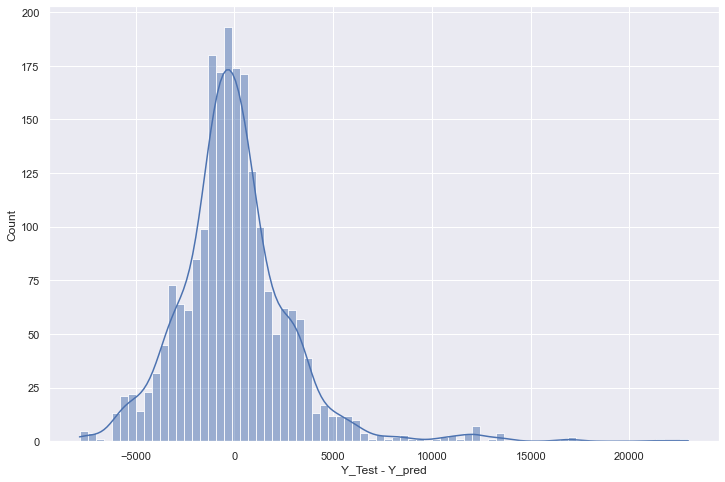

In [83]:
#Visualizing the distribution of difference in the actual value and predicted value
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

In [84]:
#Importing and Evaluating the predictions using metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae =  mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Mean Absolute Error :  1972.947113340587
Mean Squared Error :  8200354.171696914
Root Mean Squared Error :  2863.6260530482878
R2 Score :  0.619685894127461


#### Creating Model using Random Forest Regression

In [85]:
#Creating and Fitting the Model
rfm_model = RandomForestRegressor()
rfm_model.fit(X_train, Y_train)

Y_pred = rfm_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_pred[:100])

Predicted values for the Test Set
 [16808.36        5476.67        9032.32        3654.42
 15124.232       9686.5225     13259.70466667  5682.70416667
 14197.5685     13825.425       4107.89        9063.37583333
 14244.885       3857.22933333  6561.47266667  2957.15
  4186.85        6198.74       15161.96        8439.56
  2270.67666667  4601.39        5790.53583333  5600.4
 17097.92647619  5498.39        3161.21       12242.96308333
  7319.77        5268.045       4094.77       14306.6725
  4883.089       9491.26        4782.39       10265.02333333
  8920.16       10545.6675     13212.1725      4866.659
  3850.84533333  4213.38       14694.84        7581.545
 23380.9         4689.28        5560.95        5588.125
 15134.27       11562.48508333  8959.92       13094.405
 12517.377       8003.6975     15211.76166667  7681.51
  8371.82        8193.73416667 14350.591       8265.53666667
 13434.48316667 12788.975       4018.44        7191.58777778
 16650.53       11097.74416667  7980.26     

Text(0, 0.5, 'Count')

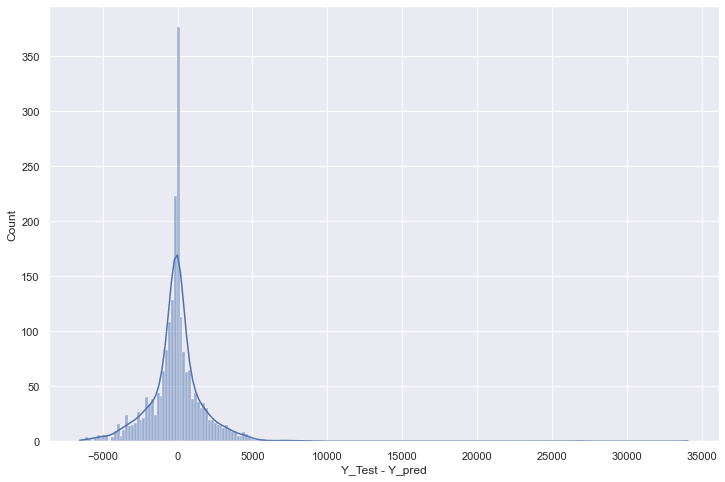

In [86]:
#Visualizing the distribution of difference in the actual value and predicted value
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

In [87]:
mae =  mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Mean Absolute Error :  1157.6955733363502
Mean Squared Error :  3846074.027007573
Root Mean Squared Error :  1961.1410013070383
R2 Score :  0.8216276792349448


#### Creating Model using Descision Tree Regressor

In [88]:
#Creating and Fitting the Model
des_model = DecisionTreeRegressor()
des_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [89]:
Y_pred = des_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_pred[:100])

Predicted values for the Test Set
 [16840.          4959.          9397.          3597.
 16079.          9554.5        11924.          6213.5
 14781.         12898.          4423.          8055.
 13502.          3841.          7110.          2754.
  4174.          6171.         16439.          8452.
  2753.          4823.          8033.          5613.
 17308.          4410.          3100.         10368.
  8040.          4995.          3943.         14533.
  4760.          8513.          4823.         13542.
  9397.          8529.         13584.          4812.
  3841.          4409.         14687.          6860.
 22270.          6722.          5409.          6218.
 11690.         13364.          8018.         13376.
 13941.         12327.         15136.          6610.
  8851.          8781.         14714.          6653.
 12898.         12284.          3943.          7229.
 16736.         10262.          8372.         12242.
 16289.         12950.5         5613.          5780.
  6121.   

Text(0, 0.5, 'Count')

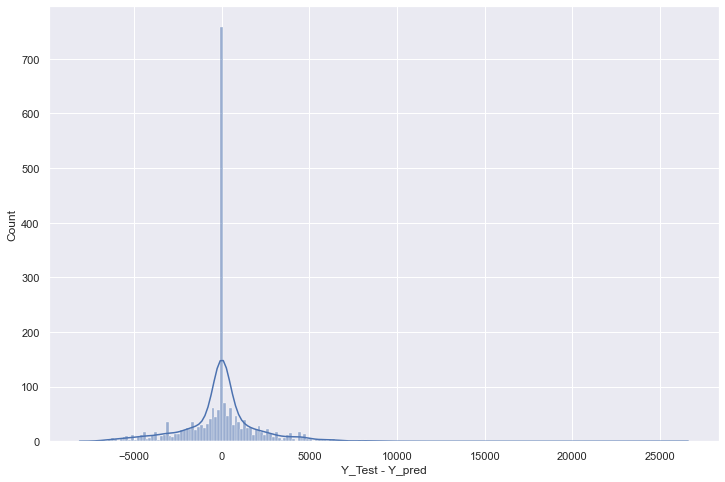

In [90]:
#Visualizing the distribution of difference in the actual value and predicted value
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

In [91]:
mae =  mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2score = r2_score(Y_test, Y_pred)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Mean Absolute Error :  1289.2662221182345
Mean Squared Error :  4725885.1337504545
Root Mean Squared Error :  2173.910102499746
R2 Score :  0.7808240057116087


### Conclusion
<ol>
    <li> Three models had been trained, namely Multiple Linear Regression, Random Forest Regression and Decision Tree Regression respectively. 
    <li> Among the three, the least RMSE score and highest R2_Score was seen for Random Forest Regression.
    <li> Therefore, the best model for prediction is Random Forest Regression.



</ol>

# Model Saving in pkl format

In [92]:
import pickle
file = open('fare_predict.pkl', 'wb')
pickle.dump(rfm_model, file)

In [95]:
from sklearn import metrics
model = open('fare_predict.pkl','rb')
forest = pickle.load(model)
Y_prediction = forest.predict(X_test)
metrics.r2_score(Y_test, Y_prediction)

0.8216276792349448